In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
qml.drawer.use_style('sketch')

In [3]:
dev = qml.device('default.qubit', wires=3)

In [4]:
@qml.qnode(dev)
def cswap_test(x):
    qml.BasisStatePreparation(x, wires=[1, 2])
    qml.Hadamard(wires=0)
    qml.CSWAP(wires=[0, 1, 2])
    qml.Hadamard(wires=0)
    return qml.probs(wires=[0])

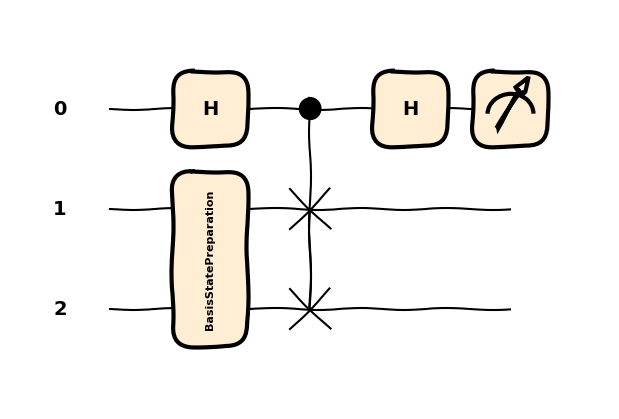

In [5]:
qml.draw_mpl(cswap_test)([0,1]) # draw the circuit
plt.show()

**Explanation of the circuit**

1) Apply Hadamard gate to first qubit (0) to create superposition
$$
H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$

2) Apply CSWAP gate to second and third qubits (1,2) with first qubit (0) as control qubit
$$
\text{CSWAP}(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|a\rangle|b\rangle) = \frac{1}{\sqrt{2}}(|0\rangle|a\rangle|b\rangle + |1\rangle|b\rangle|a\rangle)
$$

3) Apply Hadamard gate to first qubit (0) again
$$
\begin{aligned}
&\frac{1}{2}{(|0\rangle + |1\rangle)|a\rangle|b\rangle + (|0\rangle - |1\rangle)|b\rangle|a\rangle} \\
=&\frac{1}{2}|0\rangle(|a\rangle|b\rangle + |b\rangle|a\rangle) + \frac{1}{2}|1\rangle(|a\rangle|b\rangle - |b\rangle|a\rangle)
\end{aligned}
$$

4) Measure first qubit (0).
$$
P(|x\rangle = |0\rangle) = \frac{1}{4}(\langle a|\langle b| + \langle b|\langle a|)(|a\rangle|b\rangle + |b\rangle|a\rangle) = \frac{1}{4}(1 + \langle a | b \rangle \langle b | a \rangle + \langle b | a \rangle \langle a | b \rangle + 1) = \frac{1}{2}(1 + |\langle a | b \rangle|^2)
$$

In [6]:
states = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

for state in states:
    print("Input state:", state)
    print("Probabilities:", cswap_test(state))
    print()

Input state: [0, 0]
Probabilities: [1. 0.]

Input state: [0, 1]
Probabilities: [0.5 0.5]

Input state: [1, 0]
Probabilities: [0.5 0.5]

Input state: [1, 1]
Probabilities: [1. 0.]

